In [1]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
import pandas as pd
import glob
import os
import pypfopt as pyp
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import utils as u
%load_ext autoreload

In [8]:
hour_data_mid_usd = pd.read_csv('hour_data_mid_usd_est.csv', index_col='time_est')
hour_data_mid_usd = hour_data_mid_usd.drop(columns="Unnamed: 0")
hour_data_mid_usd_ret = hour_data_mid_usd.pct_change().dropna()

In [9]:
hour_data_mid_usd_ret

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_est,,,,,,,,,,
2022-01-02 19:00:00,-0.000954,-0.001188,0.000462,-0.000275,-0.000322,0.001192,0.000037,-0.001069,-0.001109,0.002570
2022-01-02 20:00:00,-0.000304,0.000586,-0.000655,-0.001369,0.000030,-0.001395,-0.000836,-0.001072,0.001175,0.001903
2022-01-02 21:00:00,-0.001400,-0.000555,-0.000868,-0.000475,-0.000973,-0.000841,-0.000983,-0.002292,-0.001356,-0.001081
2022-01-02 22:00:00,0.000498,0.000004,-0.000426,-0.000490,-0.000367,-0.000139,-0.000310,0.000468,0.000469,-0.001730
2022-01-02 23:00:00,-0.000683,0.000056,0.000146,0.000097,-0.000081,-0.000059,-0.000366,-0.000623,-0.000673,0.001106
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 12:00:00,0.001337,0.000240,-0.000117,0.000869,0.001089,0.001001,0.001992,0.001653,0.002015,-0.000075
2022-06-30 13:00:00,-0.000238,0.000037,0.000583,-0.000181,0.000021,-0.000400,0.000523,-0.000166,-0.000168,-0.001017
2022-06-30 14:00:00,0.000048,0.000738,-0.000427,-0.000506,0.000431,-0.000240,-0.002981,-0.001018,-0.001072,0.000359


In [10]:
curr_3 = hour_data_mid_usd_ret[['USD.EUR.SPOT', 'USD.JPY.SPOT', 'USD.CAD.SPOT']]

In [16]:
min_std_oracle_3 = np.abs(curr_3).min(axis=1)
min_std_oracle_3.std()*(23*252)**(1/2)

0.02954108764502787

<AxesSubplot:xlabel='time_est'>

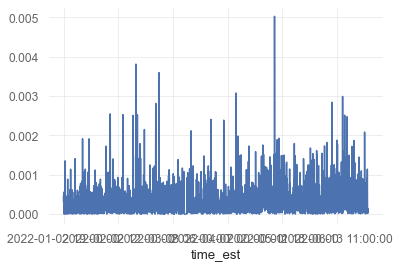

In [47]:
(min_std_oracle_3).plot()

Text(0.5, 1.0, 'Rolling Volatility of Past Month')

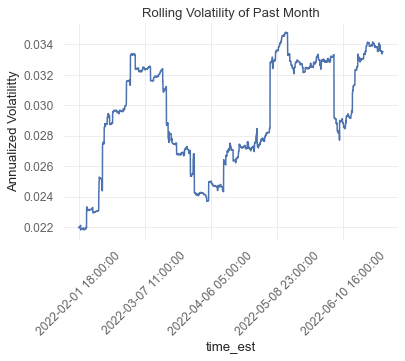

In [53]:
min_std_oracle_3_roll = (min_std_oracle_3.rolling(23*21).std()*(252*23)**(1/2)).dropna()
min_std_oracle_3_roll.plot()
plt.xticks(rotation=45)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Volatility of Past Month')

Text(0.5, 1.0, 'Rolling Volatility of Past Day')

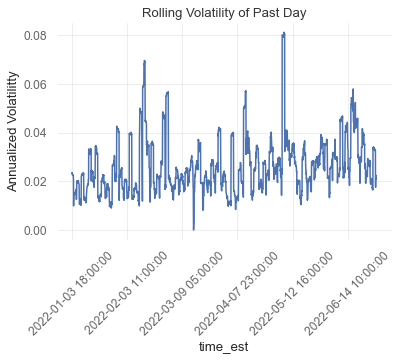

In [54]:
min_std_oracle_3_roll = (min_std_oracle_3.rolling(23).std()*(23*252)**(1/2)).dropna()
min_std_oracle_3_roll.plot()
plt.xticks(rotation=45)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Volatility of Past Day')

In [50]:
min_std_oracle_3_roll.idxmax()

'2022-05-05 08:00:00'

In [39]:
min_std_oracle_full= np.abs( hour_data_mid_usd_ret).min(axis=1)
min_std_oracle_full.std()*(23*252)**(1/2)

0.016636817331527623

Text(0.5, 1.0, 'Rolling Daily Volatility of Oracle - All Currencies')

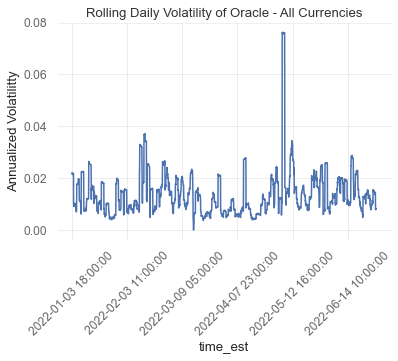

In [44]:
min_std_oracle_full_roll = (min_std_oracle_full.rolling(23).std() * (23 * 252) ** (1 / 2)).dropna()
min_std_oracle_full_roll.plot()
plt.xticks(rotation=45)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Daily Volatility of Oracle - All Currencies')

Text(0.5, 1.0, 'Rolling Monthly Volatility of Oracle - All Currencies')

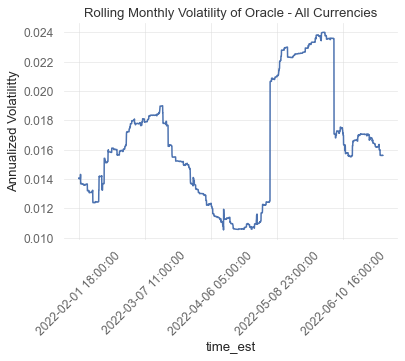

In [42]:
min_std_oracle_full_roll = (min_std_oracle_full.rolling(23*21).std() * (23 * 252) ** (1 / 2)).dropna()
min_std_oracle_full_roll.plot()
plt.xticks(rotation=45)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Monthly Volatility of Oracle - All Currencies')

#### Oracle Per State Space

### Oracle RL

In [ ]:
def runif():
    """uniform random number generator"""
    return np.random.uniform(0, 1, 1)[0]

def index_list(L):
    """from a list, build a dictionary which list element to position"""
    return dict(zip(L, [x for x in range(0, len(L))]))